## Practice Exam

```
Scoring:
============
 0-11: fail (1),
12-14: pass (2),
15-17: satisfactory (3),
18-20: good (4),
21-24: excellent (5).
```

The file [forestfires.txt](../_data/forestfires.txt) contains data about forest fires in Portugal. Write a program that estimates the value of the *area* feature from the other features! Apply 5-fold cross-validation! The error metric should be the root mean squared error (RMSE).

Subproblems:<br>
**(a)** Perform initial data analysis! Prepare the input matrix $X$ and the target vector $y$! [4 points]<br>
**(b)** Create a t-SNE based visualization of the input features! [4 points]<br>
**(c)** Introduce at least one new feature that is a engineered from the original ones. [4 points]<br>
**(d)** Create a non-tree based estimator and optimize its hyper-parameters! [6 points]<br>
**(e)** Create a tree based estimator and optimize its hyper-parameters! [6 points]<br>

### (a) Perform initial data analysis! Prepare the input matrix 𝑋 and the target vector 𝑦! [4 points]

In [1]:
import pandas as pd
df = pd.read_csv('../_data/forestfires.txt')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [2]:
# input matrix
columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X = df[columns].values

# target vector
y = df['area'].values

In [9]:
X.mean(), len(y)

AttributeError: 'numpy.ndarray' object has no attribute 'count_values'

### (b) Create a t-SNE based visualization of the input features! [4 points]

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X2 = StandardScaler().fit_transform(X)
X3 = TSNE().fit_transform(X2)

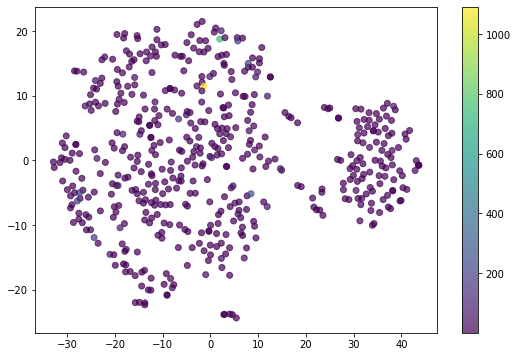

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(9, 6))
plt.scatter(X3[:, 0], X3[:, 1], c=y+1, alpha=0.7)
plt.colorbar()

### (c) Introduce at least one new feature that is a engineered from the original ones. [4 points]

In [2]:
midxs = {
    'mar': 3, 'oct': 10, 'aug': 8, 'sep': 9, 'apr': 4, 'jun': 6,
    'jul': 7, 'feb': 2, 'jan': 1, 'dec': 12, 'may': 5, 'nov': 11
}
df['month_idx'] = df['month'].map(midxs)

NameError: name 'df' is not defined

In [9]:
didxs = {'fri': 5, 'tue': 2, 'sat': 6, 'sun': 7, 'mon': 1, 'wed': 3, 'thu': 4}
df['day_idx'] = df['day'].map(didxs)

In [10]:
columns2 = columns + ['month_idx', 'day_idx']
X4 = df[columns2].values

In [11]:
X5 = StandardScaler().fit_transform(X4)

### (d) Create a non-tree based estimator and optimize its hyper-parameters! [6 points]

In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def evaluate(re, X, y):
    scores = []
    for tr, te in KFold(5, shuffle=True, random_state=42).split(X):
        re.fit(X[tr], y[tr])
        yhat = re.predict(X)
        score = mean_squared_error(y[te], yhat[te])**0.5
        scores.append(score)
    return np.mean(scores)

In [14]:
evaluate(Ridge(), X4, y)

54.438683078186806

In [17]:
from sklearn.dummy import DummyRegressor
evaluate(DummyRegressor(), X4, y)

53.992251109649864

In [25]:
data = []
for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 2000, 10000, 100000]:
    rmse = evaluate(Ridge(alpha = alpha), X5, y)
    data.append({'alpha': alpha, 'rmse': rmse})
pd.DataFrame(data).sort_values('rmse')

,alpha,rmse
7,1000.000,53.775041
6,500.000,53.784908
8,2000.000,53.808822
9,10000.000,53.925500
5,100.000,53.973732
10,100000.000,53.984287
4,10.000,54.402023
3,1.000,54.587296
2,0.100,54.612522
1,0.010,54.615136


In [31]:
from lightgbm import LGBMRegressor
evaluate(LGBMRegressor(), X5, y)

61.90750080225767

In [33]:
data = []
for num_leaves in [2, 5, 10, 20, 31, 50, 100]:
    rmse = evaluate(LGBMRegressor(num_leaves=num_leaves), X5, y)
    data.append({'num_leaves': num_leaves, 'rmse': rmse})
pd.DataFrame(data).sort_values('rmse')

,num_leaves,rmse
0,2,55.398570
1,5,61.419679
3,20,61.907501
4,31,61.907501
5,50,61.907501
6,100,61.907501
2,10,61.945891
